In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler


In [2]:
#Generating synthetic dataset
np.random.seed(42)
data_size = 1000
data = { 'Pregnancies': np.random.randint(0,17,size=data_size),
        'Glucose':np.random.randint(75,130, size=data_size),
         'BloodPressure':np.random.randint(50,120,  size= data_size),
         'SkinThickness': np.random.randint(0,50, size = data_size),
         'Insulin' : np.random.randint(0,300, size= data_size),
         'BMI': np.random.randint(18,50, size = data_size),
         'Age': np.random.randint(21,81, size = data_size),
         'Diabetic': np.random.choice([0,1], size = data_size, p =[0.7,0.3]) # 0 means non-diabetic while 1 means diabetic
         #p =[0.7,0.3] results in 70% non-diabetic and 30% diabetic
         }

#creating a dataframe
df = pd.DataFrame(data)



In [3]:
df.head()
#displaying first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Diabetic
0,6,98,96,17,47,20,75,0
1,14,128,62,8,232,28,48,1
2,10,96,71,48,99,28,48,1
3,7,79,70,28,58,38,80,1
4,6,107,58,12,257,38,79,0


In [4]:
df.shape
#displaying number of (rows, columns)

(1000, 8)

In [5]:
df.size
#displaying the dataframe size

8000

In [6]:
df.columns
#displaying all the columns name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Diabetic'],
      dtype='object')

In [7]:
df.info()
#displaying valuable information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pregnancies    1000 non-null   int64
 1   Glucose        1000 non-null   int64
 2   BloodPressure  1000 non-null   int64
 3   SkinThickness  1000 non-null   int64
 4   Insulin        1000 non-null   int64
 5   BMI            1000 non-null   int64
 6   Age            1000 non-null   int64
 7   Diabetic       1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [8]:
df.describe()
#displaying statistical properties pf dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Diabetic
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,7.699000,101.981000,83.99200,24.41600,153.913000,33.679000,50.633000,0.29400
std,5.047165,15.703606,20.10448,14.27602,84.955193,8.915236,17.077762,0.45582
min,0.000000,75.000000,50.00000,0.00000,0.000000,18.000000,21.000000,0.00000
25%,3.000000,88.000000,67.00000,12.00000,81.750000,27.000000,36.750000,0.00000
50%,7.000000,102.000000,84.00000,24.00000,156.000000,33.000000,50.000000,0.00000
75%,12.000000,116.000000,101.00000,36.00000,226.000000,41.000000,65.000000,1.00000
max,16.000000,129.000000,119.00000,49.00000,299.000000,49.000000,80.000000,1.00000


In [9]:
df.isnull().sum()
#checking for null values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Age,0
Diabetic,0


In [10]:
#checking for outliers
z_scores = stats.zscore(df)
outliers = df[(np.abs(z_scores) > 3).any(axis = 1)]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Diabetic


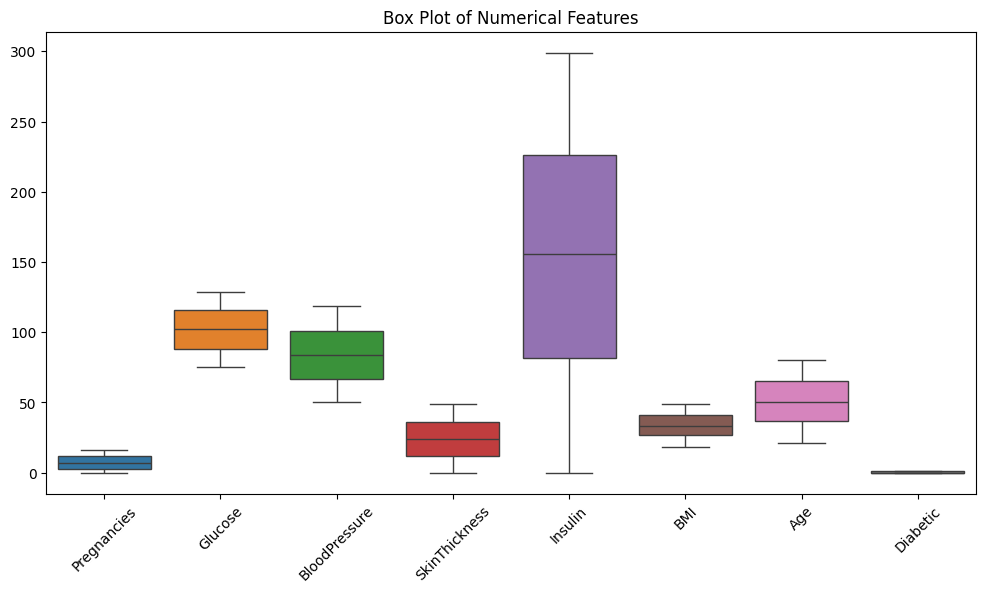

In [11]:
#Visualizing outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [12]:
#Normalizing the dataframe
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [13]:
#Deriving a new feature
def categorize_bmi(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif 18.5<+ bmi < 25:
    return 'Normal'
  elif 25<= bmi < 30:
    return 'Overweight'
  else:
    return 'Obese'


In [14]:
#Adding new feature to dataframe
df['BMI_category'] = df['BMI'].apply(categorize_bmi)

In [15]:
df.head()
#displaying th enew dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Diabetic,BMI_category
0,6,98,96,17,47,20,75,0,Normal
1,14,128,62,8,232,28,48,1,Overweight
2,10,96,71,48,99,28,48,1,Overweight
3,7,79,70,28,58,38,80,1,Obese
4,6,107,58,12,257,38,79,0,Obese


In [16]:
from sklearn.preprocessing import LabelEncoder

#Applying LabelEncoder
le = LabelEncoder()

In [17]:
#Transforming the 'BMI_category' column to numerical
df['BMI_category_encoded'] = le.fit_transform(df['BMI_category'])

In [18]:
#dropping BMI_category to just keep numerical values
df = df.drop('BMI_category', axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Diabetic,BMI_category_encoded
0,6,98,96,17,47,20,75,0,0
1,14,128,62,8,232,28,48,1,2
2,10,96,71,48,99,28,48,1,2
3,7,79,70,28,58,38,80,1,1
4,6,107,58,12,257,38,79,0,1


In [19]:
#Applying columns to feature and target
X = df.drop('Diabetic',axis=1)
y = df['Diabetic']


In [20]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#Training the model
Lr_model = LogisticRegression(max_iter=200)
# max_iter sets a limit on the number of iterations the algorithm takes to find the best model fit,
# preventing excessive computation.
Lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [22]:
#Making predictions
Lr_predictions = Lr_model.predict(X_test)

In [23]:
#Evaluating the model
model_accuracy = accuracy_score(y_test, Lr_predictions)

precision = precision_score(y_test, Lr_predictions)
recall = recall_score(y_test,Lr_predictions)
f1 = f1_score(y_test, Lr_predictions)
roc_auc = roc_auc_score(y_test,Lr_predictions)

print("Accuracy:", model_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.67
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Optimizing Hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}


In [25]:
grid_search = GridSearchCV(LogisticRegression(penalty='l2', max_iter=200), param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']})

In [26]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f' Best Parameters :{best_params}')
print(f'Best Model:{best_model}')

 Best Parameters :{'C': 0.1, 'solver': 'liblinear'}
Best Model:LogisticRegression(C=0.1, max_iter=200, solver='liblinear')


In [27]:
#Building Advanced Models
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [28]:
#Making predictions
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Model Accuracy: {rf_accuracy}')

Random Forest Model Accuracy: 0.665


In [29]:
#Making predictions on the test set
y_pred = rf_model.predict(X_test)

In [30]:
#Evalutaing the final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.665
Precision: 0.4444444444444444
Recall: 0.06060606060606061
F1-score: 0.10666666666666667
ROC-AUC: 0.5116463138851198


In [31]:
#Applying cross validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.7   0.675 0.705 0.665 0.705]
Mean CV Score: 0.6900000000000001


# REPORT

  **Introduction**

This project was carried out using machine learning models to predict the onset of diabetes based on several health indicators. A synthetic dataset containing information such as blood glucose levels, blood pressure, BMI, and age was created. The goal was to develop a model taht could accurately identify people who are at high risk of developing diabetes.

   **Data Preprocessing**

The raw data underwent several pre-processing steps to ensure its suitability for model training. Features were scaled using StandardScaler to ensure they are on the same scale. A new categorical feature, "BMI_category" was created based on existing BMI values. The categorical "BMI_category" feature was converted into numerical values using labelEncoder to make it compatible for machine learning models.

**Model Development and Optimization**

A Logistic Regression model was initially employed as a baseline model. Hyperparameter Tuning was performed using GridSearchCV to improve the LogisticRegression model's performance. Then, a Random Forest Classifier was implemented that was build upn the initial model.

**Model evaluation and validation**

Both models gave a reasonable level of accuracy,however, the Random Forest model demonstrated superior performance compared to the baseline Logistic Regression. It demonstrates a better balance between precision and recall, making it more suitable for real-world applications where accurate identification of positive cases is crucial. It also achieved an average accuracy of 69% across 5-fold cross-validation, indicating its ability to accurately predict diabetes.
